### Low CR repeats
Attempting to see repeats needed per coupling rate to get back the strand

In [27]:
%load_ext autoreload
%autoreload 2   

In [7]:

from synthesis import NaiveSynthesisModel
from Levenshtein import ratio, distance
from strand_reconstruction import make_prediction, majority_merge, align
from evaluation import get_recovery_rate
from random import sample
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import utils
from clustering import cluster_strands

In [77]:

# Iterating over coupling rates

coupling_rates = np.arange(0.9, 0.8, -0.005)
n2_repeats_for_full_recovery = []
#print(coupling_rates)
experiment_repeats = 5
strands_to_multiple_align = 40

for cr in coupling_rates:
    repeats_at_cr = []
    for experiment_repeat in range(experiment_repeats):
        synthesis_model = NaiveSynthesisModel(coupling_rate=cr, strand_length=200, repeats=500, capping=False)
        original_strand = synthesis_model.strand
        strands = synthesis_model.simulate_synthesis()
        for i in range(100, 400, 5):
            
            if i > strands_to_multiple_align:
                candidates = []
                for k in range(0, i, strands_to_multiple_align):
                    if k + strands_to_multiple_align > i:
                        candidates.append(make_prediction(strands[k: i], sample_size=i-k))
                    else:
                        candidates.append(make_prediction(strands[k: k + strands_to_multiple_align]))
                candidate = make_prediction(candidates, len(candidates))
                #candidate = majority_merge(candidates, weight=0)
            else:
                sampled_strands = sample(strands, i)
                candidate = make_prediction(sampled_strands, len(sampled_strands))
            
            edit_distance = distance(candidate, original_strand)
            recovery = get_recovery_rate(candidate, original_strand)

            if recovery == 1.0:
                repeats_at_cr.append(i)
                break
        
    mean_strands_reqd = np.mean(repeats_at_cr)
    print(f"Coupling rate {cr}, strands reqd {mean_strands_reqd}")
    n2_repeats_for_full_recovery.append(mean_strands_reqd)
        
        
        #print(edit_distance)
        #print(recovery)
        #print(align(candidate, original_strand, identity=False).format())
        #print()

Coupling rate 0.9, strands reqd 245.0


c:\Users\Parv\anaconda3\envs\pytorch_gpu\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Parv\anaconda3\envs\pytorch_gpu\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Coupling rate 0.895, strands reqd nan


KeyboardInterrupt: 

In [14]:
n_repeats_for_full_recovery = n_repeats_for_full_recovery[:-1]

In [15]:
n_repeats_for_full_recovery

[np.float64(1.0),
 np.float64(1.6),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(2.8),
 np.float64(3.0),
 np.float64(5.4),
 np.float64(5.4),
 np.float64(5.2),
 np.float64(6.6),
 np.float64(10.8),
 np.float64(13.0),
 np.float64(18.6),
 np.float64(23.0),
 np.float64(20.6),
 np.float64(30.2),
 np.float64(50.4),
 np.float64(54.5),
 np.float64(70.0),
 np.float64(94.0)]

In [32]:
coupling_rates = np.arange(1.0, 0.9, -0.005)
n_repeats_for_full_recovery = n_repeats_for_full_recovery[::-1]

In [35]:
coupling_rates

array([1.   , 0.995, 0.99 , 0.985, 0.98 , 0.975, 0.97 , 0.965, 0.96 ,
       0.955, 0.95 , 0.945, 0.94 , 0.935, 0.93 , 0.925, 0.92 , 0.915,
       0.91 , 0.905])

In [62]:
x_ticks = np.arange(0.9, 1.01, 0.01)
y_ticks = np.arange(0, 100, 10)

Text(0.5, 1.0, 'Number of repeats required per coupling rate')

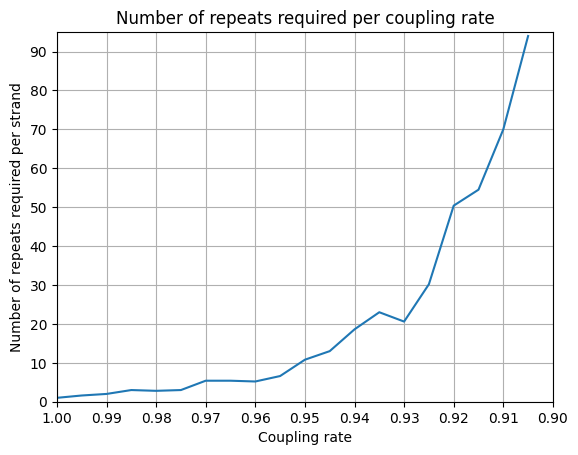

In [75]:
plt.plot(coupling_rates, n_repeats_for_full_recovery)
plt.xlabel("Coupling rate")
plt.ylabel("Number of repeats required per strand")
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()
plt.gca().invert_xaxis()
plt.xlim(1, 0.90)
plt.ylim(0, 95)
plt.title("Number of repeats required per coupling rate")